In [1]:
# library imports
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib for better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
combined_df = pd.read_csv('../data/combined_datasets.csv')
accidents_df = pd.read_csv('../data/accidents_df.csv')
licenses_df = pd.read_csv('../data/licenses_df.csv')

In [3]:
accidents_df = accidents_df.drop(['Unnamed: 0'], axis=1)

In [4]:
licenses_df = licenses_df.drop(['Unnamed: 0'], axis=1)

In [5]:
accidents_df.head()

,accident_year,region,accident_outcome,accident_count,x_point,y_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [6]:
accidents_df.columns

Index(['accident_year', 'region', 'accident_outcome', 'accident_count',
       'x_point', 'y_point'],
      dtype='object')

In [7]:
# renaming columns in accidents_df using the dictionary method:

accidents_df.rename(columns={
        'accident_year':'year',            # a_year == accidents year
        'region':'region',        # a_region == accidents region
        'accident_outcome':'accident_outcome',    # Indicator == accident outcome
        'accident_count':'accident_count',          # a_count == accidents count
        'x_point':'x_point',           # a_geoloc_x == accidents geo location x
        'y_point':'y_point'            # a_geoloc_y == accidents geo location y
            }, inplace=True)

In [8]:
accidents_df.head()

,year,region,accident_outcome,accident_count,x_point,y_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [9]:
licenses_df.columns

Index(['licese_year', 'region', 'license_count', 'x_point', 'y_point'], dtype='object')

In [9]:
# renaming columns in licenses_df using the dictionary method:

licenses_df.rename(columns={
        'licese_year':'year',                  # l_year == license year
        'region':'region', # l_region == license region
        'license_count':'license_count',      # l_count == licneses count
        'x_point':'x_point',                 # l_geoloc_x == license geo location x
        'y_point':'y_point'                  # l_geoloc_y == license geo location y
            }, inplace=True)

In [10]:
licenses_df.head()

,year,region,license_count,x_point,y_point
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [117]:
joined_df_2016_17 = pd.merge(licenses_df,accidents_df,on=['year','region'], how='inner')
joined_df_2016_17.head()

,year,region,license_count,x_point_x,y_point_x,accident_outcome,accident_count,x_point_y,y_point_y
0,2017,Hail,22035,27.400846,41.440696,No. of Casualties - Dead,265,27.400846,41.440696
1,2017,Hail,22035,27.400846,41.440696,No. of Accidents,9379,27.400846,41.440696
2,2017,Hail,22035,27.400846,41.440696,No. of Casualties - Injured,773,27.400846,41.440696
3,2017,Northern Boarder,5280,30.197075,41.817119,No. of Accidents,11540,30.197075,41.817119
4,2017,Northern Boarder,5280,30.197075,41.817119,No. of Casualties - Dead,112,30.197075,41.817119


In [16]:
joined_df_2016_17.shape

(78, 9)

In [17]:
joined_df_2016_17.to_csv('../data/joined_df_2016_17.csv')

In [118]:
#making separate df for 2017: to analyze accidents vs licenses in 2017 only

df_2017 =joined_df_2016_17[(joined_df_2016_17['year']>2016)]
df_2017.head(50)

,year,region,license_count,x_point_x,y_point_x,accident_outcome,accident_count,x_point_y,y_point_y
0,2017,Hail,22035,27.400846,41.440696,No. of Casualties - Dead,265,27.400846,41.440696
1,2017,Hail,22035,27.400846,41.440696,No. of Accidents,9379,27.400846,41.440696
2,2017,Hail,22035,27.400846,41.440696,No. of Casualties - Injured,773,27.400846,41.440696
3,2017,Northern Boarder,5280,30.197075,41.817119,No. of Accidents,11540,30.197075,41.817119
4,2017,Northern Boarder,5280,30.197075,41.817119,No. of Casualties - Dead,112,30.197075,41.817119
5,2017,Northern Boarder,5280,30.197075,41.817119,No. of Casualties - Injured,374,30.197075,41.817119
9,2017,Qassim,6318,26.196706,43.343000,No. of Accidents,22405,26.196706,43.343000
10,2017,Qassim,6318,26.196706,43.343000,No. of Casualties - Injured,1446,26.196706,43.343000
11,2017,Qassim,6318,26.196706,43.343000,No. of Casualties - Dead,319,26.196706,43.343000
12,2017,Eastern Region,126816,23.288331,50.147830,No. of Accidents,81433,23.288331,50.147830


In [49]:
#making separate df for 2016: to analyze accidents vs licenses in 2016 only

df_2016 =joined_df_2016_17[(joined_df_2016_17['year'] == 2016)]
df_2016.head()

,year,region,license_count,x_point_x,y_point_x,accident_outcome,accident_count,x_point_y,y_point_y
6,2016,Al-Baha,4614,20.148406,41.466548,No. of Casualties - Injured,1227,20.148406,41.466548
7,2016,Al-Baha,4614,20.148406,41.466548,No. of Casualties - Dead,185,20.148406,41.466548
8,2016,Al-Baha,4614,20.148406,41.466548,No. of Accidents,3618,20.148406,41.466548
18,2016,Northern Boarder,4958,30.197075,41.817119,No. of Casualties - Dead,193,30.197075,41.817119
19,2016,Northern Boarder,4958,30.197075,41.817119,No. of Casualties - Injured,631,30.197075,41.817119


In [ ]:
# Driving Licenses vs. Traffic Accidents for 2017
# Driving Licenses vs. Traffic Accidents for 2016
# Driving Licenses for 2016 vs 2017
# Traffic Accidents for 2016 vs 2017

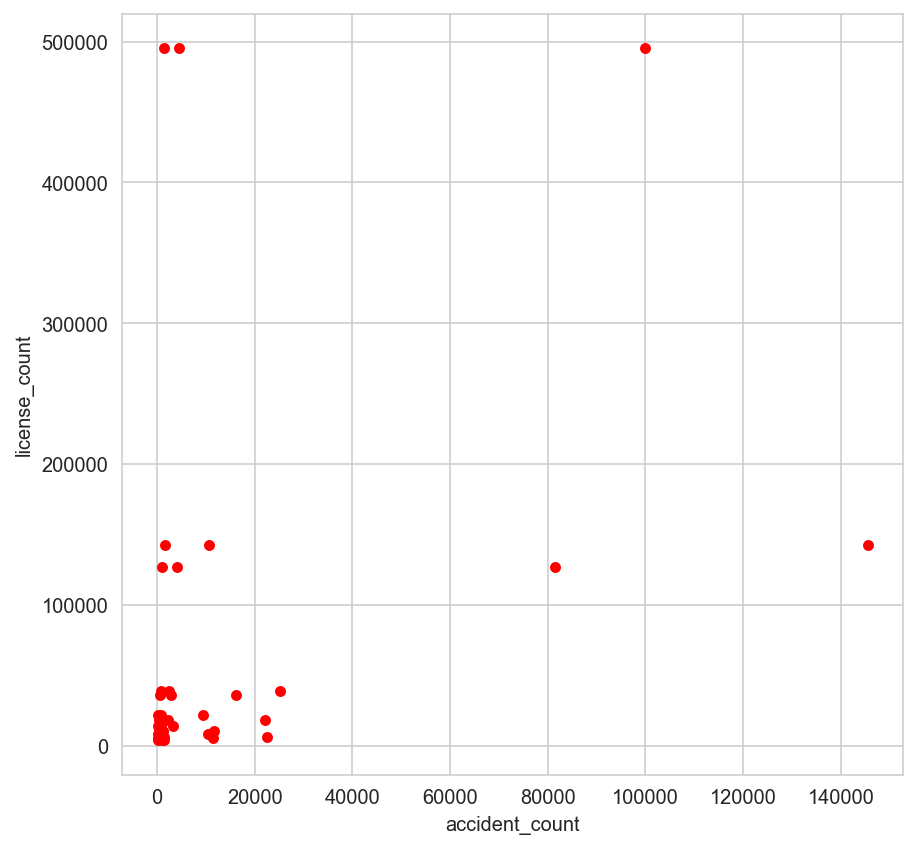

In [53]:
# Driving Licenses vs. Traffic Accidents for 2017
df_2017.plot(x='accident_count', y='license_count', kind='scatter', c='red', colormap='Reds', figsize=(7,7), s=20);

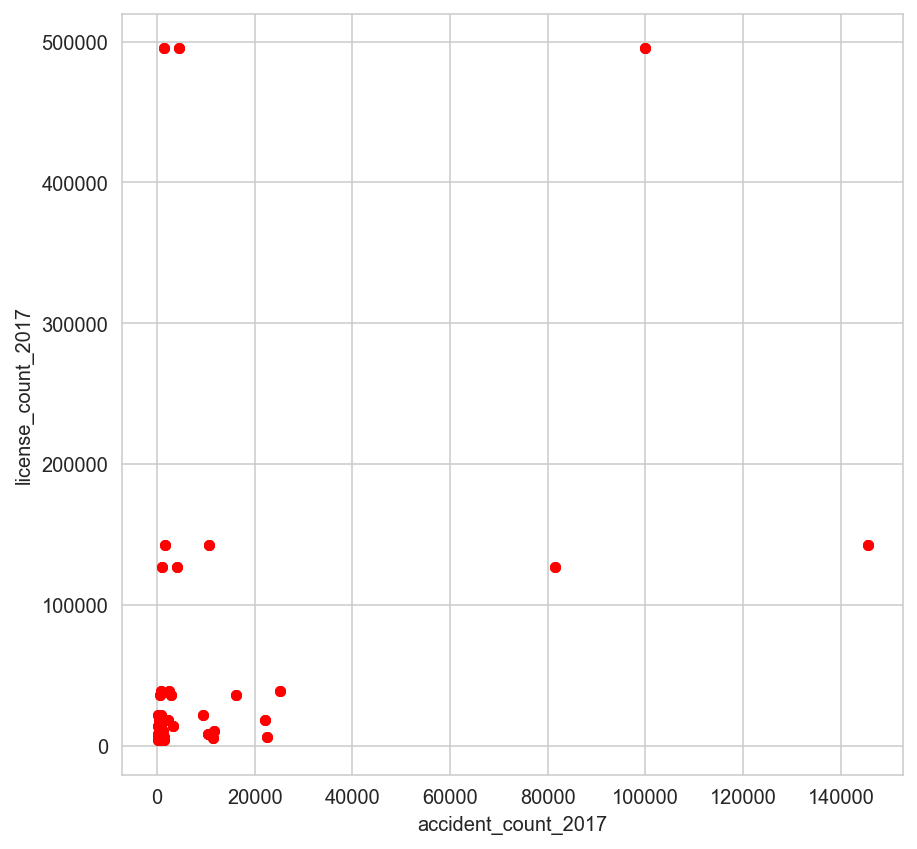

In [116]:
# just trying the above plot with c_df  delete later
c.plot(x='accident_count_2017', y='license_count_2017', kind='scatter', c='red', colormap='Reds', figsize=(7,7), s=20);

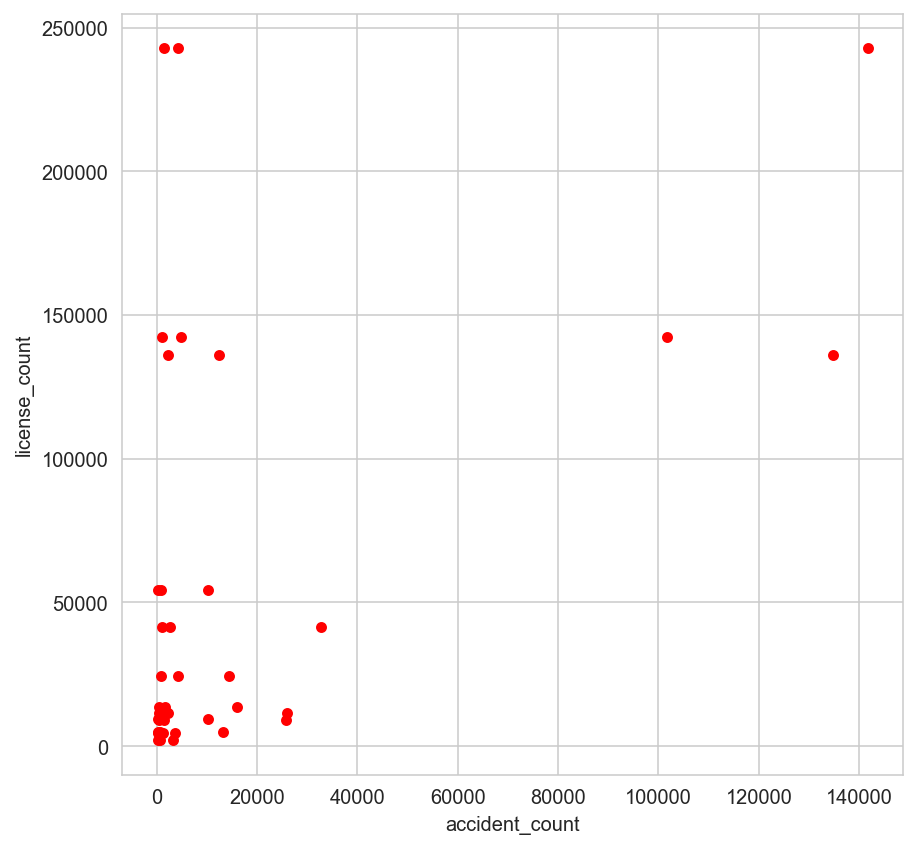

In [61]:
# Driving Licenses vs. Traffic Accidents for 2016

df_2016.plot(x='accident_count', y='license_count', kind='scatter', c='red', colormap='Reds', figsize=(7,7), s=20);

In [ ]:
# need to concat both df 2016 and 17 to do q3: # Driving Licenses for 2016 vs 2017

In [74]:
# not working. ill try full join

#concat_2016_17 = pd.concat([df_2016,df_2017], axis=0) #colum axis =1, row axis = 0

#concat_2016_17.head(40)

In [75]:
outer_join = pd.merge(df_2016,df_2017,on='region',how='outer')
outer_join.head(5)

,year_x,region,license_count_x,x_point_x_x,y_point_x_x,accident_outcome_x,accident_count_x,x_point_y_x,y_point_y_x,year_y,license_count_y,x_point_x_y,y_point_x_y,accident_outcome_y,accident_count_y,x_point_y_y,y_point_y_y
0,2016,Al-Baha,4614,20.148406,41.466548,No. of Casualties - Injured,1227,20.148406,41.466548,2017,4131,20.148406,41.466548,No. of Casualties - Dead,134,20.148406,41.466548
1,2016,Al-Baha,4614,20.148406,41.466548,No. of Casualties - Injured,1227,20.148406,41.466548,2017,4131,20.148406,41.466548,No. of Accidents,1414,20.148406,41.466548
2,2016,Al-Baha,4614,20.148406,41.466548,No. of Casualties - Injured,1227,20.148406,41.466548,2017,4131,20.148406,41.466548,No. of Casualties - Injured,1007,20.148406,41.466548
3,2016,Al-Baha,4614,20.148406,41.466548,No. of Casualties - Dead,185,20.148406,41.466548,2017,4131,20.148406,41.466548,No. of Casualties - Dead,134,20.148406,41.466548
4,2016,Al-Baha,4614,20.148406,41.466548,No. of Casualties - Dead,185,20.148406,41.466548,2017,4131,20.148406,41.466548,No. of Accidents,1414,20.148406,41.466548


In [76]:
outer_join.shape

(117, 17)

In [ ]:
# a.i will try separate years and acci_count in one df 
# b. and separate years and lic count in one df
# c. and separate years lic and acci in one df

In [106]:
c = outer_join[['year_x','year_y','license_count_x','license_count_y','accident_count_x','accident_count_y']]
c.head()

,year_x,year_y,license_count_x,license_count_y,accident_count_x,accident_count_y
0,2016,2017,4614,4131,1227,134
1,2016,2017,4614,4131,1227,1414
2,2016,2017,4614,4131,1227,1007
3,2016,2017,4614,4131,185,134
4,2016,2017,4614,4131,185,1414


In [107]:
c.columns

Index(['year_x', 'year_y', 'license_count_x', 'license_count_y',
       'accident_count_x', 'accident_count_y'],
      dtype='object')

In [108]:
c.rename(columns={
        'year_x':'year_2016',                  # year == license year
        'year_y':'year_2017', # region == license region
        'license_count_x':'license_count_2016',      # count == licneses count
        'license_count_y':'license_count_2017',                 # geo_x == license geo location x
        'accident_count_x':'accident_count_2016',
        'accident_count_y':'accident_count_2017'                                 # geo_y == license geo location y
            }, inplace = True)

/home/ahmed/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [110]:
c.head()

,year_2016,year_2017,license_count_2016,license_count_2017,accident_count_2016,accident_count_2017
0,2016,2017,4614,4131,1227,134
1,2016,2017,4614,4131,1227,1414
2,2016,2017,4614,4131,1227,1007
3,2016,2017,4614,4131,185,134
4,2016,2017,4614,4131,185,1414


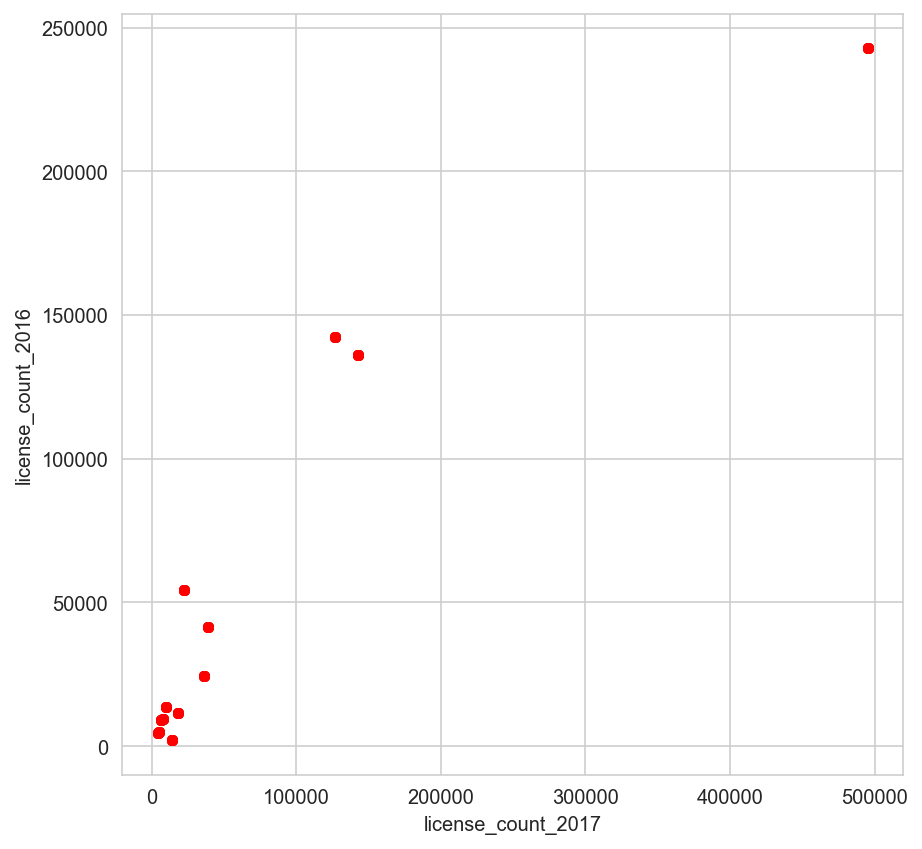

In [112]:

c.plot(x='license_count_2017', y='license_count_2016', kind='scatter', c='red', colormap='Reds', figsize=(7,7), s=20);

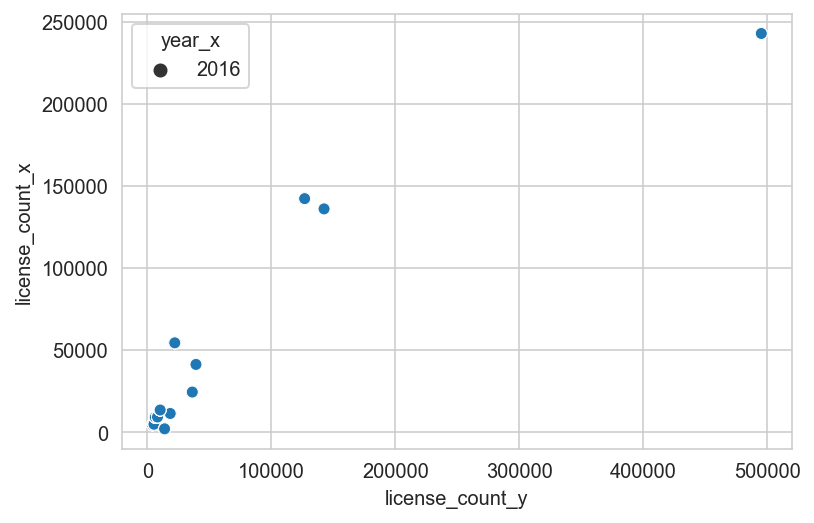

In [87]:
#sns.scatterplot(data=outer_join, x="total_bill", y="tip", hue="time", style="time")
sns.scatterplot(x='license_count_y', y='license_count_x', data=outer_join, style='year_x')
plt.show()


#just rename cols in outer_df

In [88]:
outer_join.license_count_x.sum() #2016 this explains the fig. more lice +ev corre in lic# from 2016-2017

6273153

In [90]:
outer_join.license_count_y.sum() # 2017

8353485

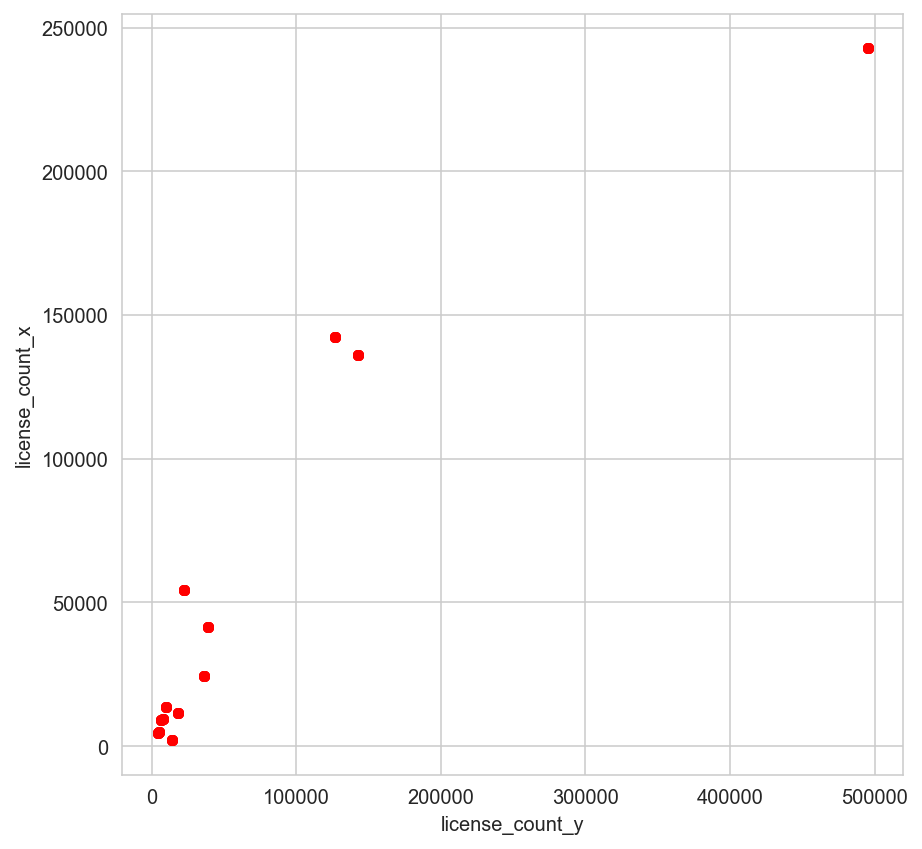

In [91]:
# pick either this graph or one above

# after performing and out join, lets do q3: # Driving Licenses for 2016 vs 2017

outer_join.plot(x='license_count_y', y='license_count_x', kind='scatter', c='red', colormap='Reds', figsize=(7,7), s=20);


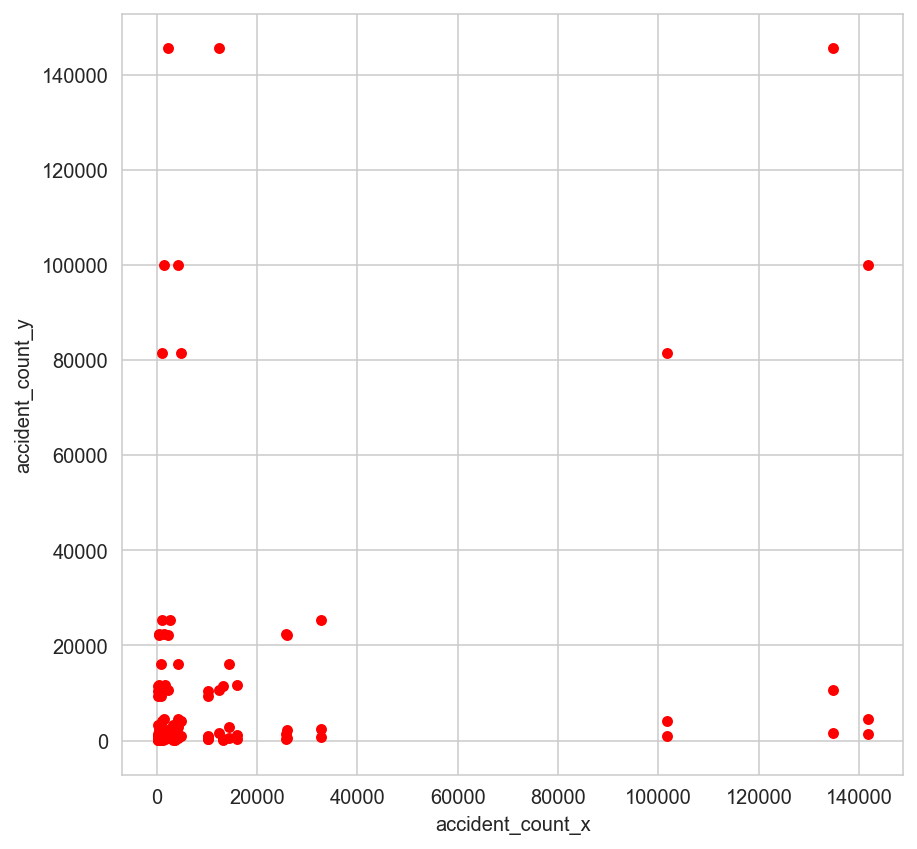

In [94]:
#Traffic Accidents for 2016 vs 2017
outer_join.plot(x='accident_count_x', y='accident_count_y', kind='scatter', c='red', colormap='Reds', figsize=(7,7), s=20);

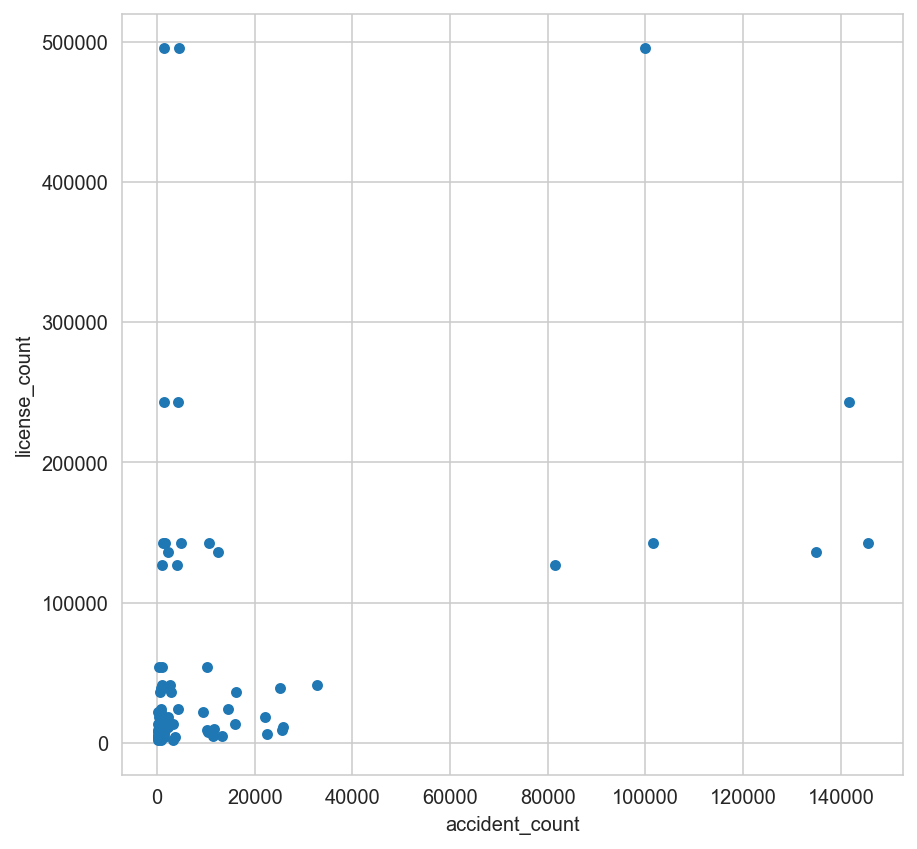

In [39]:


joined_df_2016_17.plot(kind='scatter', x='accident_count', y='license_count',figsize=(7,7));

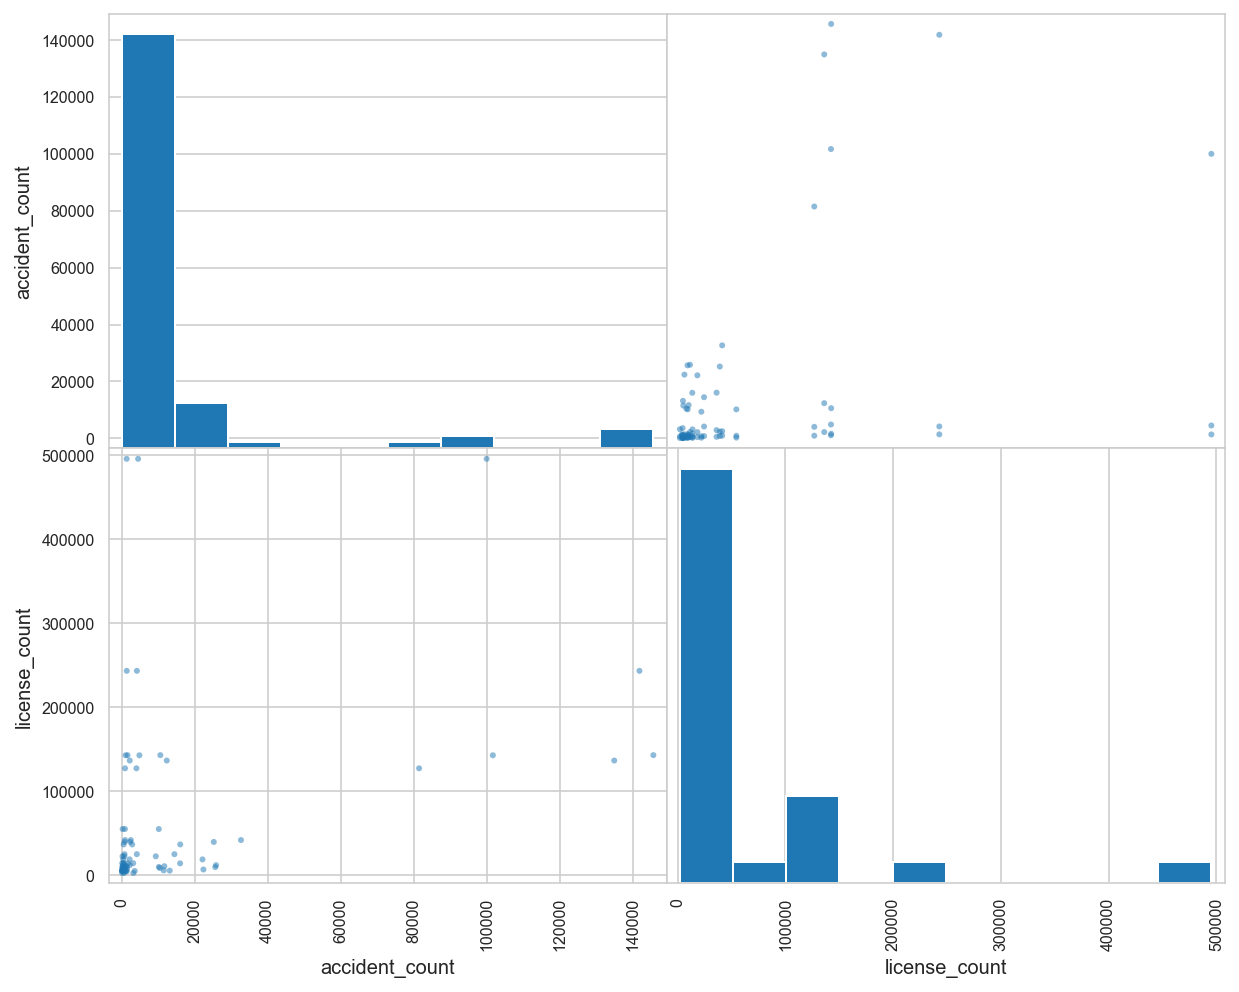

In [20]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(joined_df_2016_17[['accident_count', 'license_count']], figsize=(10, 8));

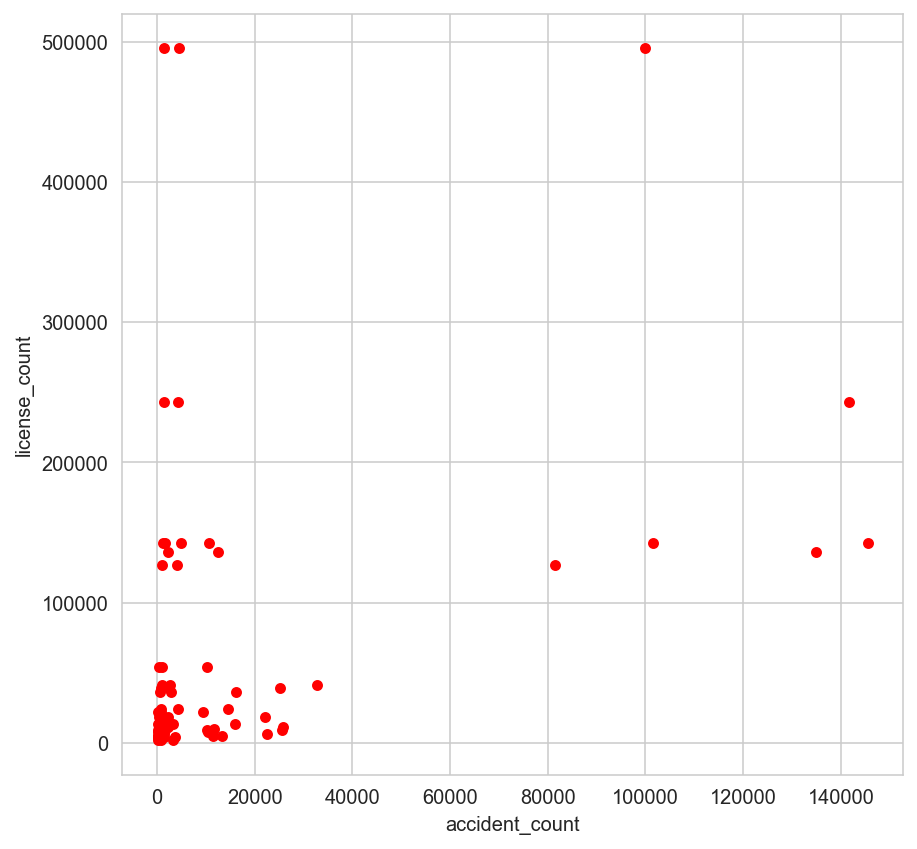

In [38]:
joined_df_2016_17.plot(x='accident_count', y='license_count', kind='scatter', c='red', colormap='Reds', figsize=(7,7), s=20);